#RESTAURANT REVENUE PREDICTION

#INTRODUCTION

The restaurant industry is highly competitive, with numerous factors influencing business success. This project aims to analyze key attributes such as pricing, customer engagement, service quality, and marketing strategies to understand their impact on restaurant revenue. By leveraging data-driven insights,  restaurant owners can make  decisions regarding pricing, marketing budgets, and operational improvements. Additionally, we explore predictive modeling techniques to estimate restaurant revenue based on various attributes.



#DATASET

This dataset contains information about various restaurants and aims to predict the revenue based on several features. Each row represents a unique restaurant with various attributes that may influence its revenue.

Columns


* Name: The name of the restaurant.

* Location: The location of the restaurant (e.g., Rural, Downtown).

* Cuisine: The type of cuisine offered (e.g., Japanese, Mexican, Italian).

* Rating: The average rating of the restaurant.

* Seating Capacity: The number of seats available in the restaurant.

* Average Meal Price: The average price of a meal at the restaurant.

* Marketing Budget: The marketing budget allocated for the restaurant.

* Social Media Followers: The number of social media followers.

* Chef Experience Years: The number of years of experience of the head chef.

* Number of Reviews: The total number of reviews the restaurant has received.

* Avg Review Length: The average length of reviews.

* Ambience Score: A score representing the ambience of the restaurant.

* Service Quality Score: A score representing the quality of service.

* Parking Availability: Indicates if parking is available (Yes/No).

* Weekend Reservations: The number of reservations made on weekends.

* Weekday Reservations: The number of reservations made on weekdays.

* Revenue: The total revenue generated by the restaurant.

In [102]:
import pandas as pd

In [103]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/ML Project/restaurant_data.csv')

#PREPROCESSING

In [104]:
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [105]:
df.tail()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48
8367,Restaurant 8367,Rural,Japanese,4.0,33,71.07,2003,24268,8,197,151.838065,5.9,7.5,Yes,5,12,534142.98


In [106]:
df.shape

(8368, 17)

In [107]:
df.size

142256

In [108]:
df.columns

Index(['Name', 'Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue'],
      dtype='object')

In [109]:
# Rename the columns
df = df.rename(columns={
    'Seating Capacity': 'Seating_Capacity',
    'Average Meal Price': 'Average_Meal_Price',
    'Marketing Budget': 'Marketing_Budget',
    'Social Media Followers': 'Social_Media_Followers',
    'Chef Experience Years': 'Chef_Experience_Years',
    'Number of Reviews': 'Number_of_Reviews',
    'Avg Review Length': 'Avg_Review_Length',
    'Ambience Score': 'Ambience_Score',
    'Service Quality Score': 'Service_Quality_Score',
    'Parking Availability': 'Parking_Availability',
    'Weekend Reservations': 'Weekend_Reservations',
    'Weekday Reservations': 'Weekday_Reservations',
})

In [110]:
df.ndim

2

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating_Capacity        8368 non-null   int64  
 5   Average_Meal_Price      8368 non-null   float64
 6   Marketing_Budget        8368 non-null   int64  
 7   Social_Media_Followers  8368 non-null   int64  
 8   Chef_Experience_Years   8368 non-null   int64  
 9   Number_of_Reviews       8368 non-null   int64  
 10  Avg_Review_Length       8368 non-null   float64
 11  Ambience_Score          8368 non-null   float64
 12  Service_Quality_Score   8368 non-null   float64
 13  Parking_Availability    8368 non-null   object 
 14  Weekend_Reservations    8368 non-null   

In [112]:
df.describe()

,Rating,Seating_Capacity,Average_Meal_Price,Marketing_Budget,Social_Media_Followers,Chef_Experience_Years,Number_of_Reviews,Avg_Review_Length,Ambience_Score,Service_Quality_Score,Weekend_Reservations,Weekday_Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [113]:
df.isna().sum()

,0
Name,0
Location,0
Cuisine,0
Rating,0
Seating_Capacity,0
Average_Meal_Price,0
Marketing_Budget,0
Social_Media_Followers,0
Chef_Experience_Years,0
Number_of_Reviews,0


In [114]:
df.duplicated().sum()

0

In [115]:
df.head()

,Name,Location,Cuisine,Rating,Seating_Capacity,Average_Meal_Price,Marketing_Budget,Social_Media_Followers,Chef_Experience_Years,Number_of_Reviews,Avg_Review_Length,Ambience_Score,Service_Quality_Score,Parking_Availability,Weekend_Reservations,Weekday_Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [116]:
df.drop(['Name'],axis=1,inplace=True)

#OUTLIER

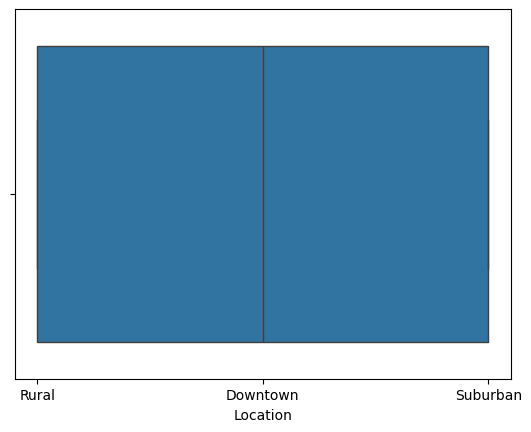

Location ****************************************************************************************************


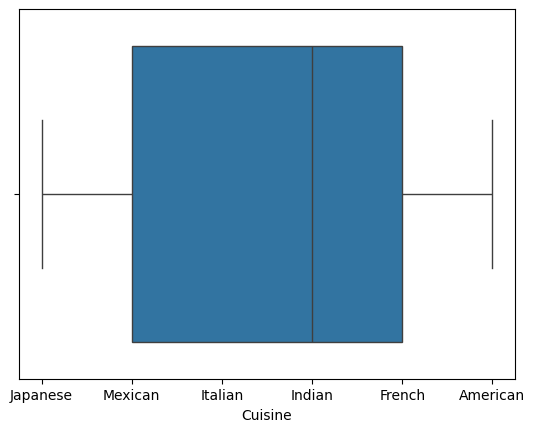

Cuisine ****************************************************************************************************


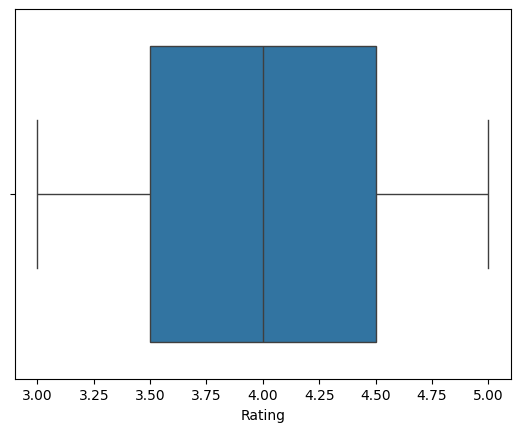

Rating ****************************************************************************************************


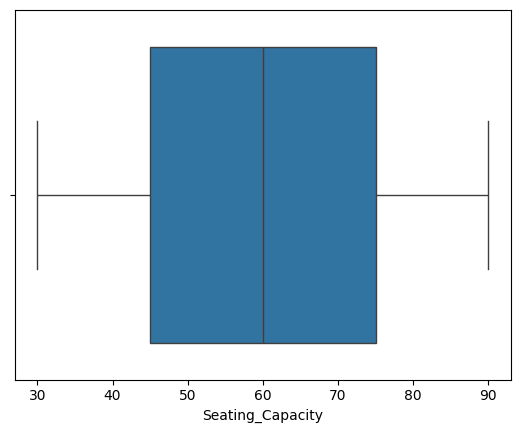

Seating_Capacity ****************************************************************************************************


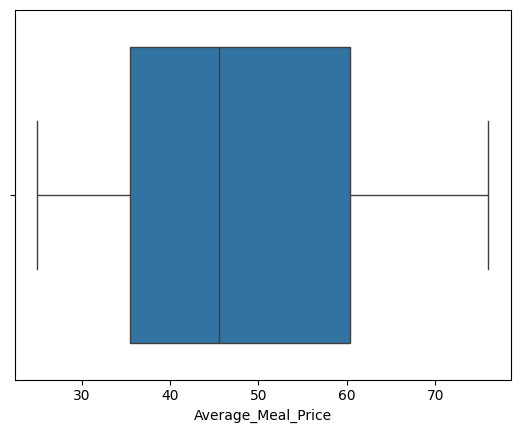

Average_Meal_Price ****************************************************************************************************


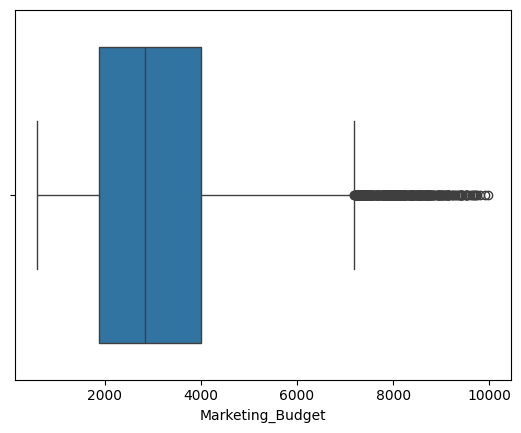

Marketing_Budget ****************************************************************************************************


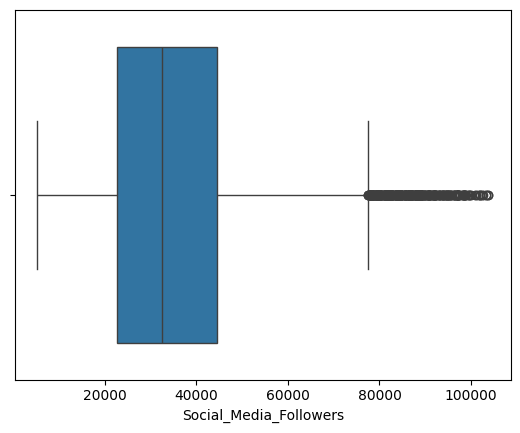

Social_Media_Followers ****************************************************************************************************


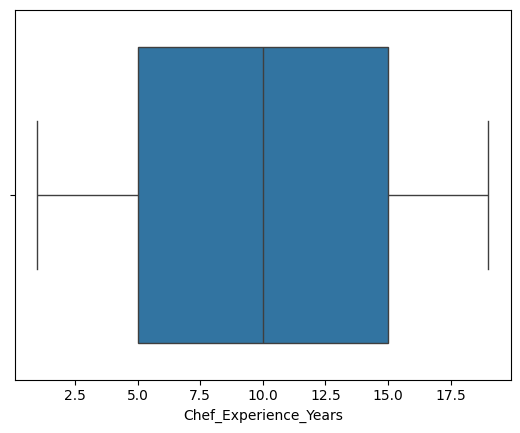

Chef_Experience_Years ****************************************************************************************************


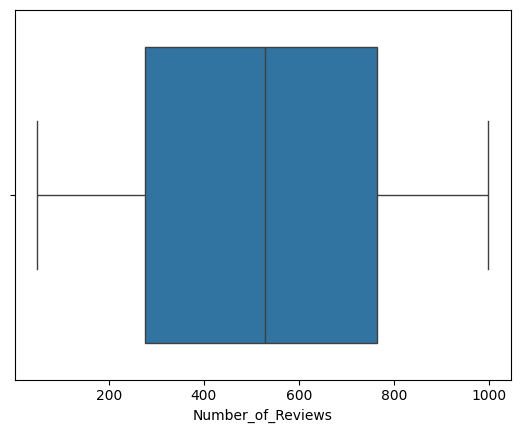

Number_of_Reviews ****************************************************************************************************


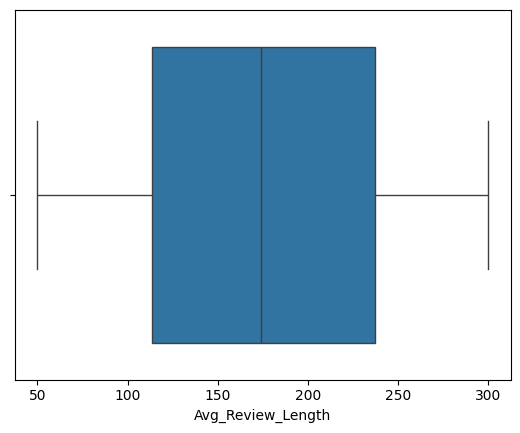

Avg_Review_Length ****************************************************************************************************


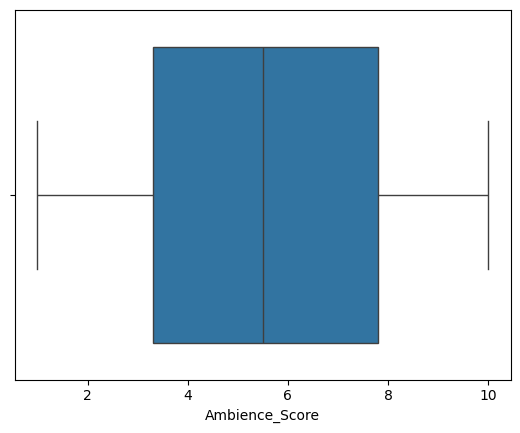

Ambience_Score ****************************************************************************************************


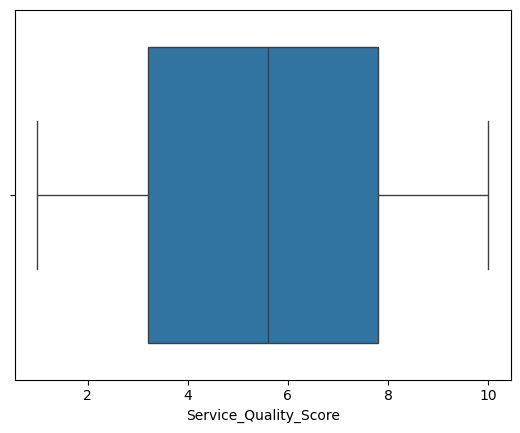

Service_Quality_Score ****************************************************************************************************


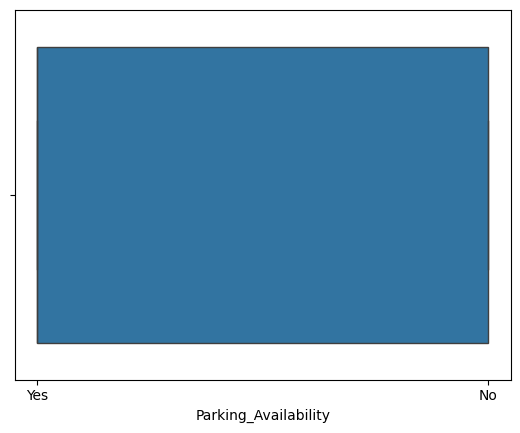

Parking_Availability ****************************************************************************************************


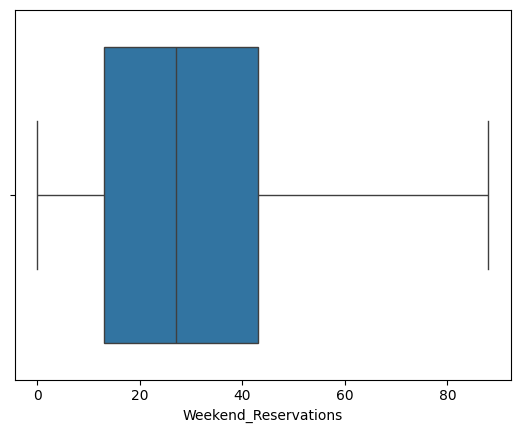

Weekend_Reservations ****************************************************************************************************


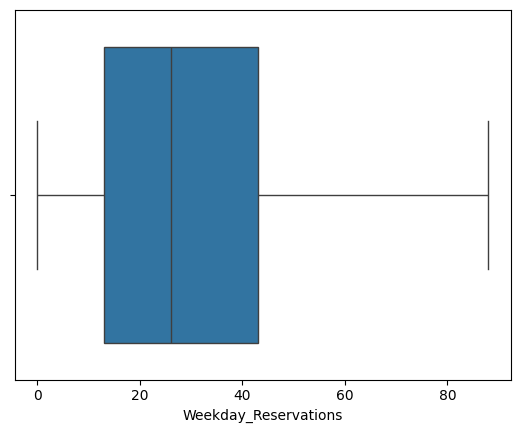

Weekday_Reservations ****************************************************************************************************


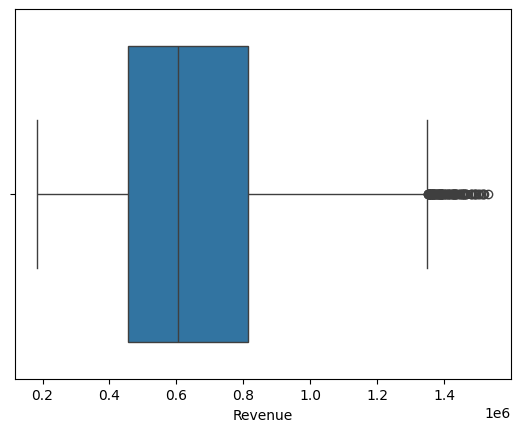

Revenue ****************************************************************************************************


In [ ]:
# outlier checking
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
  sns.boxplot(x = df[i])
  plt.show()
  print(i,'*'*100)

#VISUALIZATION

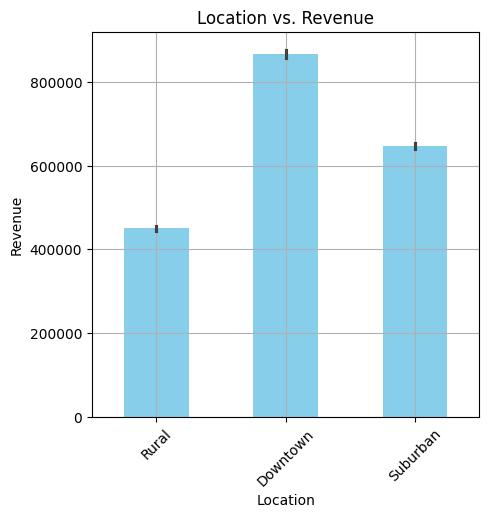

In [117]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x='Location', y='Revenue',facecolor = 'skyblue',width = 0.5)
plt.title('Location vs. Revenue')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

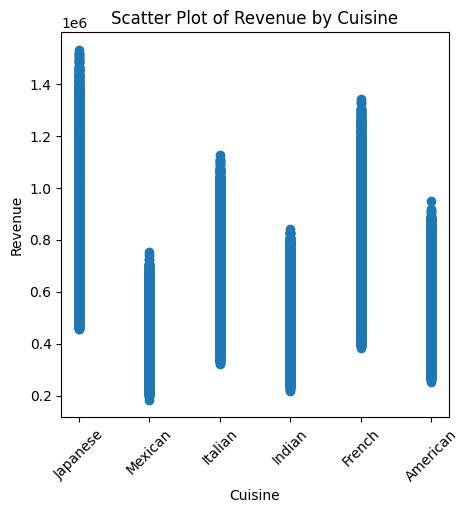

In [118]:
plt.figure(figsize=(5,5))
plt.scatter(df['Cuisine'], df['Revenue'])
plt.xlabel('Cuisine')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Revenue by Cuisine')
plt.xticks(rotation=45)
plt.show()


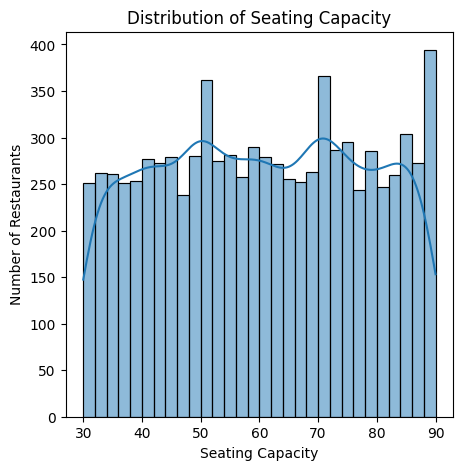

In [119]:
plt.figure(figsize=(5, 5))
sns.histplot(df["Seating_Capacity"], bins=30, kde=True)
plt.title("Distribution of Seating Capacity")
plt.xlabel("Seating Capacity")
plt.ylabel("Number of Restaurants")
plt.show()

#ENCODING

In [120]:
column_name = df.columns
for i in column_name:
  print(df[i].value_counts(),i)
  print('*'*100)

Location
Downtown    2821
Suburban    2785
Rural       2762
Name: count, dtype: int64 Location
****************************************************************************************************
Cuisine
French      1433
American    1416
Italian     1413
Mexican     1393
Indian      1369
Japanese    1344
Name: count, dtype: int64 Cuisine
****************************************************************************************************
Rating
3.9    448
4.8    438
3.7    436
4.1    433
4.9    428
4.4    425
4.5    424
3.2    421
4.7    419
3.1    416
3.4    412
3.8    409
3.5    409
4.6    409
4.3    406
4.2    404
3.3    400
4.0    400
3.6    387
5.0    233
3.0    211
Name: count, dtype: int64 Rating
****************************************************************************************************
Seating_Capacity
50    252
70    246
84    165
74    165
42    156
     ... 
43    117
33    115
80    112
46    111
51    110
Name: count, Length: 61, dtype: int64 Seating_Capacity
*****

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                8368 non-null   object 
 1   Cuisine                 8368 non-null   object 
 2   Rating                  8368 non-null   float64
 3   Seating_Capacity        8368 non-null   int64  
 4   Average_Meal_Price      8368 non-null   float64
 5   Marketing_Budget        8368 non-null   int64  
 6   Social_Media_Followers  8368 non-null   int64  
 7   Chef_Experience_Years   8368 non-null   int64  
 8   Number_of_Reviews       8368 non-null   int64  
 9   Avg_Review_Length       8368 non-null   float64
 10  Ambience_Score          8368 non-null   float64
 11  Service_Quality_Score   8368 non-null   float64
 12  Parking_Availability    8368 non-null   object 
 13  Weekend_Reservations    8368 non-null   int64  
 14  Weekday_Reservations    8368 non-null   

In [122]:
df['Location'].unique()

array(['Rural', 'Downtown', 'Suburban'], dtype=object)

In [123]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(df[['Location']])
ohe = encoder.transform(df[['Location']])

In [124]:
df1 = pd.DataFrame(ohe,columns=encoder.get_feature_names_out(['Location']))


In [125]:
df['Cuisine'].unique()

array(['Japanese', 'Mexican', 'Italian', 'Indian', 'French', 'American'],
      dtype=object)

In [126]:
from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder(sparse_output=False)
encoder1.fit(df[['Cuisine']])
ohe1 = encoder1.transform(df[['Cuisine']])

In [127]:
df2 = pd.DataFrame(ohe1,columns=encoder1.get_feature_names_out(['Cuisine']))

In [128]:
df['Parking_Availability'].unique()

array(['Yes', 'No'], dtype=object)

In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Parking_Availability'])
df['Parking_Availability'] = le.transform(df['Parking_Availability'])

In [130]:
df = pd.concat([df,df1,df2],axis=1)

In [131]:
df.drop(['Location','Cuisine'],axis = 1,inplace = True)

In [132]:
df.head()

,Rating,Seating_Capacity,Average_Meal_Price,Marketing_Budget,Social_Media_Followers,Chef_Experience_Years,Number_of_Reviews,Avg_Review_Length,Ambience_Score,Service_Quality_Score,...,Revenue,Location_Downtown,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
0,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,...,638945.52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,...,490207.83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,...,541368.62,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,...,404556.80,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,...,1491046.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  8368 non-null   float64
 1   Seating_Capacity        8368 non-null   int64  
 2   Average_Meal_Price      8368 non-null   float64
 3   Marketing_Budget        8368 non-null   int64  
 4   Social_Media_Followers  8368 non-null   int64  
 5   Chef_Experience_Years   8368 non-null   int64  
 6   Number_of_Reviews       8368 non-null   int64  
 7   Avg_Review_Length       8368 non-null   float64
 8   Ambience_Score          8368 non-null   float64
 9   Service_Quality_Score   8368 non-null   float64
 10  Parking_Availability    8368 non-null   int64  
 11  Weekend_Reservations    8368 non-null   int64  
 12  Weekday_Reservations    8368 non-null   int64  
 13  Revenue                 8368 non-null   float64
 14  Location_Downtown       8368 non-null   

#CORRELATION MATRIX

In [134]:
mtx = df.corr()
mtx

,Rating,Seating_Capacity,Average_Meal_Price,Marketing_Budget,Social_Media_Followers,Chef_Experience_Years,Number_of_Reviews,Avg_Review_Length,Ambience_Score,Service_Quality_Score,...,Revenue,Location_Downtown,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
Rating,1.000000,0.004862,-0.002265,0.263448,0.289559,0.022192,-0.004238,-0.001272,0.007099,0.000887,...,0.009899,0.006263,0.005679,-0.011950,-0.012385,-0.005692,0.003498,0.004955,0.003248,0.006564
Seating_Capacity,0.004862,1.000000,-0.028809,0.509560,0.496917,0.010324,-0.016100,-0.032670,0.002842,-0.006400,...,0.677317,0.814315,-0.811398,-0.007211,0.016810,-0.010265,0.008924,0.006770,-0.029894,0.007256
Average_Meal_Price,-0.002265,-0.028809,1.000000,-0.002054,-0.005753,0.000401,0.001802,0.016013,-0.001094,0.011714,...,0.686365,-0.010335,0.036249,-0.025806,-0.234287,0.400996,-0.382676,0.076984,0.687995,-0.545283
Marketing_Budget,0.263448,0.509560,-0.002054,1.000000,0.987511,0.021612,-0.008985,-0.030064,0.008120,-0.000693,...,0.365322,0.622723,-0.316364,-0.309008,0.009743,-0.003619,-0.003892,0.009984,-0.005476,-0.006925
Social_Media_Followers,0.289559,0.496917,-0.005753,0.987511,1.000000,0.022943,-0.009181,-0.025464,0.007428,0.000210,...,0.354466,0.608523,-0.306920,-0.304187,0.010324,-0.006644,-0.001934,0.009763,-0.006615,-0.005049
Chef_Experience_Years,0.022192,0.010324,0.000401,0.021612,0.022943,1.000000,-0.007710,0.001865,-0.001288,-0.008508,...,0.026899,0.014314,-0.005878,-0.008495,0.017818,0.009575,-0.007096,0.018363,-0.018637,-0.020670
Number_of_Reviews,-0.004238,-0.016100,0.001802,-0.008985,-0.009181,-0.007710,1.000000,0.005842,0.010186,0.005432,...,-0.008233,-0.001765,0.012077,-0.010281,0.002915,-0.008763,0.012167,-0.006017,0.006338,-0.006350
Avg_Review_Length,-0.001272,-0.032670,0.016013,-0.030064,-0.025464,0.001865,0.005842,1.000000,0.004807,0.008836,...,-0.011278,-0.030104,0.026696,0.003560,-0.015154,0.007628,-0.017849,0.008519,0.012234,0.004637
Ambience_Score,0.007099,0.002842,-0.001094,0.008120,0.007428,-0.001288,0.010186,0.004807,1.000000,0.000612,...,0.003388,0.004462,0.008883,-0.013341,-0.015673,0.000209,0.012678,0.009851,-0.001770,-0.005188
Service_Quality_Score,0.000887,-0.006400,0.011714,-0.000693,0.000210,-0.008508,0.005432,0.008836,0.000612,1.000000,...,0.005375,-0.001725,0.007996,-0.006249,0.006023,-0.007061,-0.007333,-0.013813,0.022526,0.000047


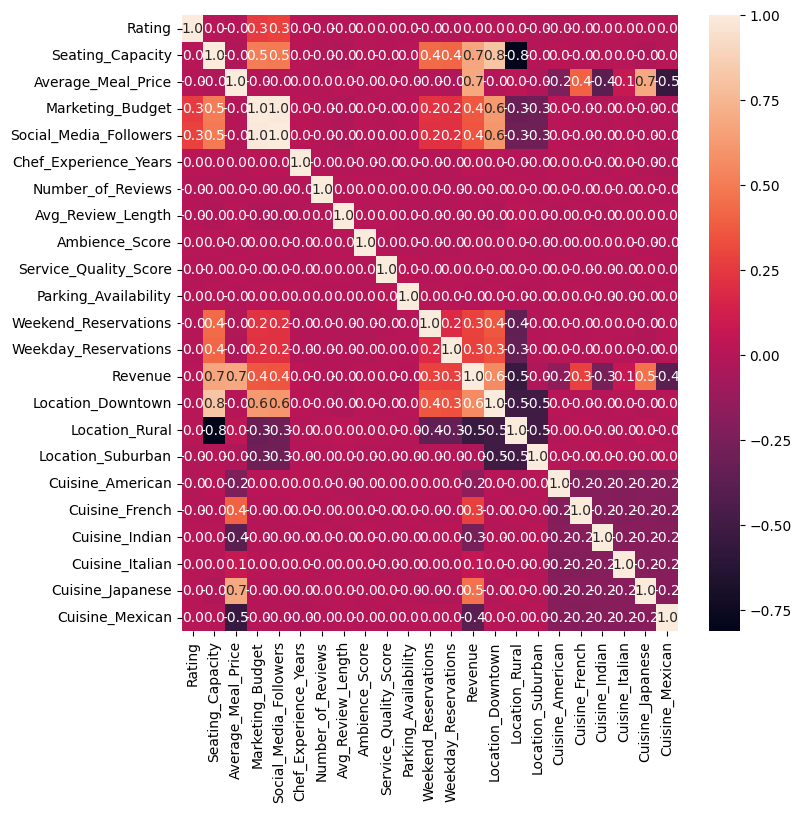

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(mtx,annot=True,fmt = '0.1f')
plt.show()

In [136]:
mtx1 = df.corr()['Revenue']
mtx1

,Revenue
Rating,0.009899
Seating_Capacity,0.677317
Average_Meal_Price,0.686365
Marketing_Budget,0.365322
Social_Media_Followers,0.354466
Chef_Experience_Years,0.026899
Number_of_Reviews,-0.008233
Avg_Review_Length,-0.011278
Ambience_Score,0.003388
Service_Quality_Score,0.005375


<Axes: >

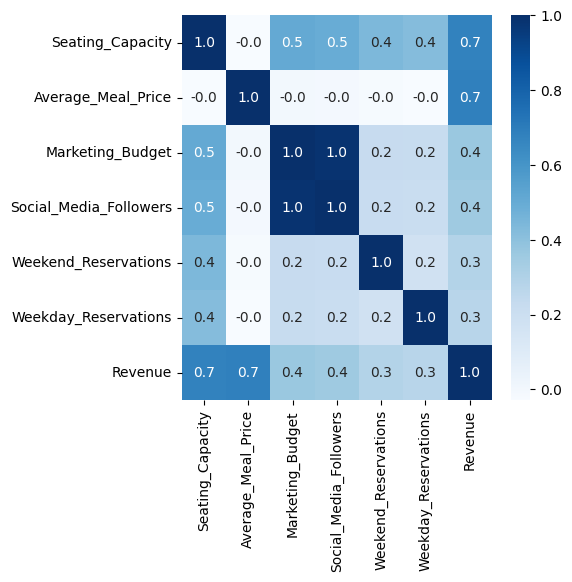

In [137]:
plt.figure(figsize=(5,5))
sns.heatmap(df[['Seating_Capacity','Average_Meal_Price','Marketing_Budget','Social_Media_Followers','Weekend_Reservations','Weekday_Reservations','Revenue']].corr(),annot=True,fmt = '0.1f',cmap='Blues')

In [138]:
df.drop(['Rating', 'Number_of_Reviews', 'Avg_Review_Length', 'Parking_Availability'],axis = 1,inplace = True)

In [139]:
df.head()

,Seating_Capacity,Average_Meal_Price,Marketing_Budget,Social_Media_Followers,Chef_Experience_Years,Ambience_Score,Service_Quality_Score,Weekend_Reservations,Weekday_Reservations,Revenue,Location_Downtown,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
0,38,73.98,2224,23406,13,1.3,7.0,13,4,638945.52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,76,28.11,4416,42741,8,2.6,3.4,48,6,490207.83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,48,48.29,2796,37285,18,5.3,6.7,27,14,541368.62,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,34,51.55,1167,15214,13,4.6,2.8,9,17,404556.80,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,88,75.98,3639,40171,9,8.6,2.1,37,26,1491046.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [140]:
df.shape

(8368, 19)

#MODEL

In [141]:
x = df.drop('Revenue',axis = 1)
y = df['Revenue']

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42 )

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [144]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
import numpy as np

#KNN

In [145]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [146]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [147]:
help(knn)

Help on KNeighborsRegressor in module sklearn.neighbors._regression object:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 

In [148]:
knn_params = {
    "n_neighbors": [ 3,5,7,9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan","minkowski"],
}
knn_grid = GridSearchCV(knn,knn_params,cv = 5,scoring = 'r2')
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [149]:
print('Best Parameters : ',knn_grid.best_params_)
print('Best Score : ',knn_grid.best_score_)

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score :  0.9479466569964637


In [150]:
knn1 = KNeighborsRegressor(n_neighbors=9, weights='distance', metric='manhattan')
knn1.fit(x_train,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=9, weights='distance')

In [151]:
ypred_knn = knn1.predict(x_test)
ypred_knn

array([ 446245.76383896,  293300.46126226,  472716.54794478, ...,
        774438.50753865, 1190852.6717656 ,  957143.44136812])

In [152]:
from sklearn.metrics import r2_score
r2_score_knn = r2_score(y_test,ypred_knn)
print('R2 Score : ',r2_score_knn)

R2 Score :  0.9547762980553545


In [153]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mae_knn = mean_absolute_error(y_test,ypred_knn)
mse_knn = mean_squared_error(y_test,ypred_knn)
rmse_knn = root_mean_squared_error(y_test,ypred_knn)
print('mean_absolute_error : ',mae_knn)
print('mean_squared_error : ',mse_knn)
print('root_mean_squared_error : ',rmse_knn)

mean_absolute_error :  45711.20088658399
mean_squared_error :  3241264983.6788816
root_mean_squared_error :  56932.10854762786


In [154]:
print('Training Score : ',knn1.score(x_train,y_train))
print('Testing Score : ',knn1.score(x_test,y_test))

Training Score :  1.0
Testing Score :  0.9547762980553545


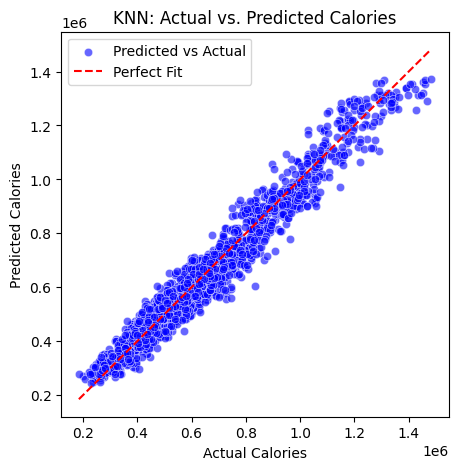

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=ypred_knn, color='blue', alpha=0.6, label="Predicted vs Actual")
# Perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("KNN: Actual vs. Predicted Calories")
plt.legend()
plt.show()

#LINEAR REGRESSION

In [156]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [157]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [158]:
help(lr)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

In [159]:
import warnings
warnings.filterwarnings('ignore')

In [160]:
lr_params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}
lr_grid = GridSearchCV(lr,lr_params,cv = 5,scoring = 'r2')
lr_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [161]:
print('Best Parameters : ',lr_grid.best_params_)
print('Best Score : ',lr_grid.best_score_)

Best Parameters :  {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Score :  0.9583006360519937


In [162]:
lr1 = LinearRegression(copy_X=True, fit_intercept=True, positive=True)
lr1.fit(x_train,y_train)

LinearRegression(positive=True)

In [163]:
ypred_lr = lr1.predict(x_test)
ypred_lr

array([ 464619.72526   ,  225236.13225453,  472588.07062293, ...,
        842828.22388874, 1084790.86327055,  977619.27648684])

In [164]:
from sklearn.metrics import r2_score
r2_score_lr = r2_score(y_test,ypred_lr)
print('R2 Score : ',r2_score_lr)

R2 Score :  0.9557812974840868


In [165]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mae_lr = mean_absolute_error(y_test,ypred_lr)
mse_lr = mean_squared_error(y_test,ypred_lr)
rmse_lr = root_mean_squared_error(y_test,ypred_lr)
print('mean_absolute_error : ',mae_lr)
print('mean_squared_error : ',mse_lr)
print('root_mean_squared_error : ',rmse_lr)

mean_absolute_error :  42968.794923227106
mean_squared_error :  3169234846.4522862
root_mean_squared_error :  56295.95763864654


In [166]:
print('Training Score : ',lr1.score(x_train,y_train))
print('Testing Score : ',lr1.score(x_test,y_test))

Training Score :  0.9585882442799912
Testing Score :  0.9557812974840868


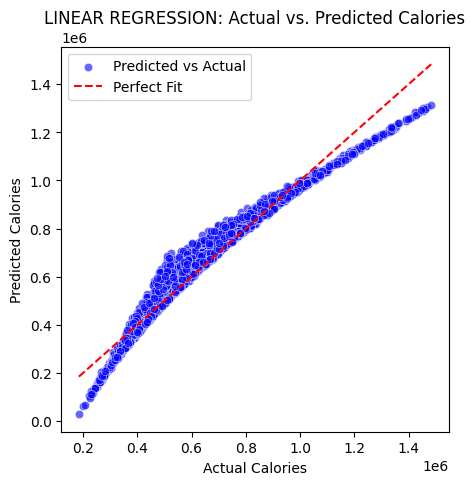

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=ypred_lr, color='blue', alpha=0.6, label="Predicted vs Actual")
# Perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("LINEAR REGRESSION: Actual vs. Predicted Calories")
plt.legend()
plt.show()

#DECISION TREE

In [168]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [169]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [170]:
help(dt)

Help on DecisionTreeRegressor in module sklearn.tree._classes object:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error w

In [171]:
dt_params = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
     "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
dt_grid = GridSearchCV(dt,dt_params,cv = 5,scoring = 'r2')
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [172]:
print('Best Parameters : ',dt_grid.best_params_)
print('Best Score : ',dt_grid.best_score_)

Best Parameters :  {'criterion': 'poisson', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Score :  0.996904118951463


In [173]:
dt1 = DecisionTreeRegressor(criterion='poisson', max_depth=20, min_samples_leaf=4, min_samples_split=2, splitter='best')
dt1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=20, min_samples_leaf=4)

In [174]:
ypred_dt = dt1.predict(x_test)
ypred_dt

array([ 498715.12      ,  297612.44      ,  459834.99333333, ...,
        815587.686     , 1171753.09666667,  936803.266     ])

In [175]:
from sklearn.metrics import r2_score
r2_score_dt = r2_score(y_test,ypred_dt)
print('R2 Score : ',r2_score_dt)

R2 Score :  0.9973697699862251


In [176]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mae_dt = mean_absolute_error(y_test,ypred_dt)
mse_dt = mean_squared_error(y_test,ypred_dt)
rmse_dt = root_mean_squared_error(y_test,ypred_dt)
print('mean_absolute_error : ',mae_dt)
print('mean_squared_error : ',mse_dt)
print('root_mean_squared_error : ',rmse_dt)

mean_absolute_error :  10508.999522116974
mean_squared_error :  188513369.6729406
root_mean_squared_error :  13730.017103883762


In [177]:
print('Training Score : ',dt1.score(x_train,y_train))
print('Testing Score : ',dt1.score(x_test,y_test))

Training Score :  0.9993236345937481
Testing Score :  0.9973697699862251


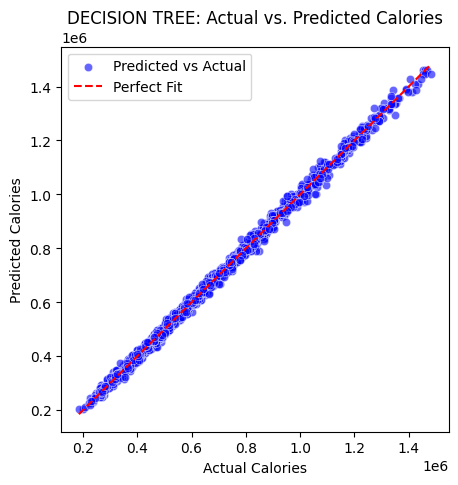

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=ypred_dt, color='blue', alpha=0.6, label="Predicted vs Actual")
# Perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("DECISION TREE: Actual vs. Predicted Calories")
plt.legend()
plt.show()

#SVM

In [179]:
from sklearn.svm import SVR
svm = SVR()

In [180]:
svm.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [181]:
help(svm)

Help on SVR in module sklearn.svm._classes object:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precompu

In [182]:
svm_params = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
    "C": [0.1, 1, 10],
    "epsilon": [0.1, 0.5, 1],
}
svm_grid = GridSearchCV(svm,svm_params,cv = 5,scoring = 'r2')
svm_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'epsilon': [0.1, 0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [183]:
print('Best Parameters : ',svm_grid.best_params_)
print('Best Score : ',svm_grid.best_score_)

Best Parameters :  {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score :  0.5526854514748596


In [184]:
svm1 = SVR(C=10, degree=2, epsilon=0.1, gamma='scale', kernel='linear')
svm1.fit(x_train,y_train)

SVR(C=10, degree=2, kernel='linear')

In [185]:
ypred_svm = svm1.predict(x_test)
ypred_svm

array([514750.81623779, 374584.54377423, 519138.43343269, ...,
       704509.58886887, 780001.75487751, 727247.87220301])

In [186]:
from sklearn.metrics import r2_score
r2_score_svm = r2_score(y_test,ypred_svm)
print('R2 Score : ',r2_score_svm)

R2 Score :  0.6412655454203972


In [187]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mae_svm = mean_absolute_error(y_test,ypred_svm)
mse_svm = mean_squared_error(y_test,ypred_svm)
rmse_svm = root_mean_squared_error(y_test,ypred_svm)
print('mean_absolute_error : ',mae_svm)
print('mean_squared_error : ',mse_svm)
print('root_mean_squared_error : ',rmse_svm)

mean_absolute_error :  116464.82184575776
mean_squared_error :  25711150924.602215
root_mean_squared_error :  160346.9704253941


In [188]:
print('Training Score : ',svm1.score(x_train,y_train))
print('Testing Score : ',svm1.score(x_test,y_test))

Training Score :  0.6406120445145763
Testing Score :  0.6412655454203972


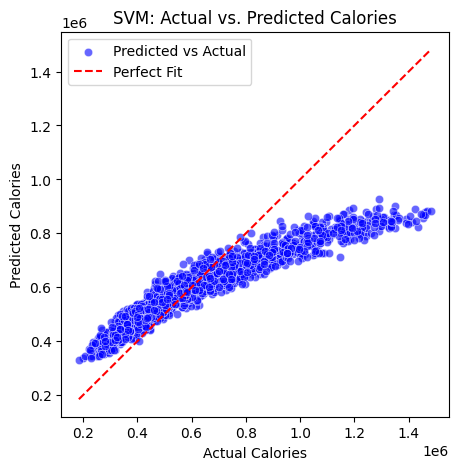

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=ypred_svm, color='blue', alpha=0.6, label="Predicted vs Actual")
# Perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("SVM: Actual vs. Predicted Calories")
plt.legend()
plt.show()

#RANDOM FOREST

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [87]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [88]:
help(rf)

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstra

In [89]:
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 15, 20],
    "min_samples_split": [2,5, 10],
    "min_samples_leaf": [1,2,4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_grid = GridSearchCV(rf,rf_params,cv = 5,scoring = 'r2',n_jobs = -1)
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [90]:
print('Best Parameters : ',rf_grid.best_params_)
print('Best Score : ',rf_grid.best_score_)

Best Parameters :  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score :  0.9926007887750827


In [91]:
rf1 = RandomForestRegressor(max_depth=20,max_features = 'sqrt',min_samples_leaf=1, min_samples_split=2, n_estimators=300,random_state = 42)
rf1.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [92]:
ypred_rf = rf1.predict(x_test)
ypred_rf

array([ 476544.01235055,  297279.70083556,  449518.44382414, ...,
        805963.3509734 , 1193310.20640833,  931019.4141927 ])

In [93]:
from sklearn.metrics import r2_score
r2_score_rf = r2_score(y_test,ypred_rf)
print('R2 Score : ',r2_score_rf)

R2 Score :  0.9944240021852747


In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mae_rf = mean_absolute_error(y_test,ypred_rf)
mse_rf = mean_squared_error(y_test,ypred_rf)
rmse_rf = root_mean_squared_error(y_test,ypred_rf)
print('mean_absolute_error : ',mae_rf)
print('mean_squared_error : ',mse_rf)
print('root_mean_squared_error : ',rmse_rf)

mean_absolute_error :  15317.830806936076
mean_squared_error :  399641906.539652
root_mean_squared_error :  19991.045658985724


In [95]:
print('Training Score : ',rf1.score(x_train,y_train))
print('Testing Score : ',rf1.score(x_test,y_test))

Training Score :  0.9990751994300723
Testing Score :  0.9944240021852747


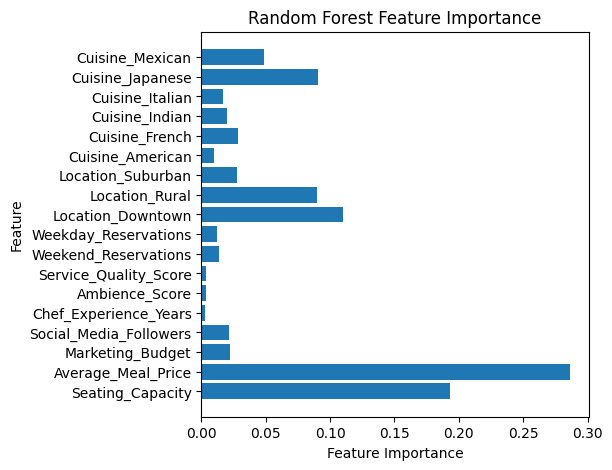

In [96]:
import matplotlib.pyplot as plt

feature_importances = rf1.best_estimator_.feature_importances_
features = df.drop(columns=["Revenue"]).columns  # Exclude target variable

plt.figure(figsize=(5,5))
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


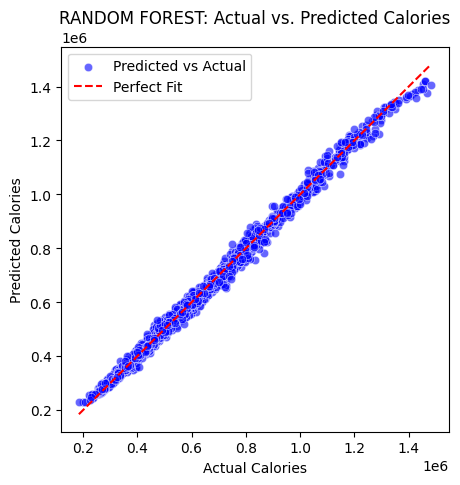

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=ypred_rf, color='blue', alpha=0.6, label="Predicted vs Actual")
# Perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("RANDOM FOREST: Actual vs. Predicted Calories")
plt.legend()
plt.show()

#ADABOOST

In [190]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [191]:
ada.get_params()

{'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [193]:
help(ada)

Help on AdaBoostRegressor in module sklearn.ensemble._weight_boosting object:

class AdaBoostRegressor(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.RegressorMixin, BaseWeightBoosting)
 |  AdaBoostRegressor(estimator=None, *, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
 |  
 |  An AdaBoost regressor.
 |  
 |  An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
 |  regressor on the original dataset and then fits additional copies of the
 |  regressor on the same dataset but where the weights of instances are
 |  adjusted according to the error of the current prediction. As such,
 |  subsequent regressors focus more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost.R2 [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensem

In [195]:
from random import randint, uniform

ada_params = {
    'n_estimators': [randint(1, 101)],
    'learning_rate': [uniform(0.01, 0.98)],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [randint(1, 43)]
}
ada_grid = GridSearchCV(ada, ada_params, cv=5, scoring='r2')
ada_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.6408531408339623],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [75], 'random_state': [33]},
             scoring='r2')

In [197]:
print('Best Parameters : ',ada_grid.best_params_)
print('Best Score : ',ada_grid.best_score_)

Best Parameters :  {'learning_rate': 0.6408531408339623, 'loss': 'square', 'n_estimators': 75, 'random_state': 33}
Best Score :  0.9711452800646274


In [198]:
ada1=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),learning_rate= 0.6408531408339623, loss= 'square', n_estimators= 75, random_state= 33)
ada1.fit(x_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=0.6408531408339623, loss='square',
                  n_estimators=75, random_state=33)

In [199]:
ypred_ada = ada1.predict(x_test)
ypred_ada

array([ 482879.  ,  297426.82,  454736.8 , ...,  824330.35, 1167723.95,
        939553.96])

In [200]:
from sklearn.metrics import r2_score
r2_score_ada = r2_score(y_test,ypred_ada)
print('R2 Score : ',r2_score_ada)

R2 Score :  0.9991171880265525


In [201]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mae_ada = mean_absolute_error(y_test,ypred_ada)
mse_ada = mean_squared_error(y_test,ypred_ada)
rmse_ada = root_mean_squared_error(y_test,ypred_ada)
print('mean_absolute_error : ',mae_ada)
print('mean_squared_error : ',mse_ada)
print('root_mean_squared_error : ',rmse_ada)

mean_absolute_error :  6251.770089605733
mean_squared_error :  63272740.03818212
root_mean_squared_error :  7954.416385768482


In [202]:
print('Training Score : ',ada1.score(x_train,y_train))
print('Testing Score : ',ada1.score(x_test,y_test))

Training Score :  0.9999975983177456
Testing Score :  0.9991171880265525


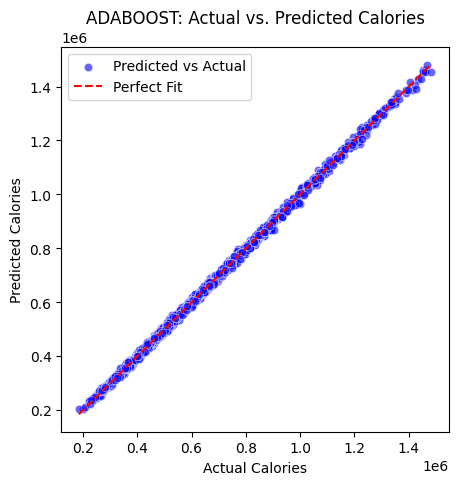

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=ypred_ada, color='blue', alpha=0.6, label="Predicted vs Actual")
# Perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("ADABOOST: Actual vs. Predicted Calories")
plt.legend()
plt.show()

# Final

In [205]:
import pandas as pd
results = {
 "Model": ["KNN", "Linear Regression", "Decision Tree", "SVM", "Random Forest","Adaboost"],
 "R² Score": [r2_score_knn, r2_score_lr,r2_score_dt, r2_score_svm, r2_score_rf,r2_score_ada],
 "MAE": [mae_knn,mae_lr,mae_dt,mae_svm,mae_rf,mae_ada],
 "RMSE": [rmse_knn, rmse_lr,rmse_dt, rmse_svm,rmse_rf,rmse_ada]
 }
pd.DataFrame(results).sort_values(by="R² Score", ascending=False)

,Model,R² Score,MAE,RMSE
5,Adaboost,0.999117,6251.770090,7954.416386
2,Decision Tree,0.997370,10508.999522,13730.017104
4,Random Forest,0.994424,15317.830807,19991.045659
1,Linear Regression,0.955781,42968.794923,56295.957639
0,KNN,0.954776,45711.200887,56932.108548
3,SVM,0.641266,116464.821846,160346.970425


#SAV

In [207]:
import pickle
pickle.dump(ada1,open('model.sav','wb'))
pickle.dump(scaler,open('scaler.sav','wb'))
pickle.dump(encoder,open('EL.sav','wb'))
pickle.dump(encoder1,open('EC.sav','wb'))

In [206]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.13
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.20.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.10.0.29.26
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.2.0
audioread          

#CONCLUSION

 Through data exploration and analysis, we identified significant factors influencing restaurant revenue, such as pricing strategies, marketing efforts, and service quality. Our findings suggest that customer engagement, social media presence, and ambiance scores play a crucial role in attracting customers. By implementing predictive modeling, we can estimate revenue trends and provide valuable recommendations for restaurant owners. Future enhancements could include incorporating external factors like economic trends or seasonal effects to improve model accuracy.